# Image Understanding. Course 2021-2022: Practice 1


### Names: Víctor Morcuende Castell and Antonio Ruiz García
### Group number: 13

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from skimage.io import imread

drive.mount('/content/drive')
!cp -r drive/MyDrive/Image_Understanding .

Mounted at /content/drive


###### Point 1: Read, Transform and Show the three components from the RGB original image.


In [2]:
def open_preprocess_image(filename: str) -> np.array:
  im = imread(filename)
  plt.imshow(im)
  im = im.astype(np.float32)
  im = im - 50
  im[im<0] = 0
  im = im.astype(np.uint8)
  plt.imshow(im)
  return im

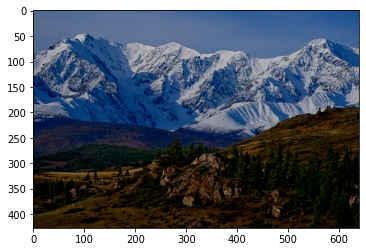

In [3]:
filename = '/content/drive/MyDrive/Image_Understanding/Mountains.jpg'
im_rgb = open_preprocess_image(filename)

red_channel = im_rgb[:,:,0] # the red channel
green_channel = im_rgb[:,:,1] # the green channel
blue_channel = im_rgb[:,:,2] # the blue channel

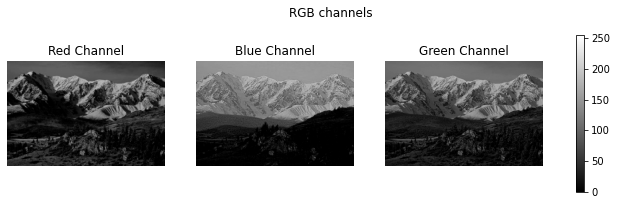

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
fig.suptitle('RGB channels')
ims = ax1.imshow(red_channel, cmap='gray', vmax=255, vmin=0)
ax1.axis('off')
ax1.set_title('Red Channel')
ims = ax2.imshow(blue_channel, cmap='gray', vmax=255, vmin=0)
ax2.set_title('Blue Channel')
ax2.axis('off')
ims = ax3.imshow(green_channel, cmap='gray', vmax=255, vmin=0)
ax3.set_title('Green Channel')
ax3.axis('off')
plt.subplots_adjust(top=0.85)
fig.colorbar(ims, ax=[ax1, ax2, ax3])
plt.show()

###### Point 2: Transform the original color image selected to the HSV color space and show the three components from the HSV image.

In [5]:
def rgb_to_hsv(im_rgb: np.array) -> np.array:
  im_hsv = cv2.cvtColor(im_rgb, cv2.COLOR_RGB2HSV)
  im_hsv = im_hsv.astype(np.uint8)
  return im_hsv

In [6]:
im_hsv = rgb_to_hsv(im_rgb)

h_channel = im_hsv[:,:,0] # the H channel
s_channel = im_hsv[:,:,1] # the S channel
v_channel = im_hsv[:,:,2] # the V channel

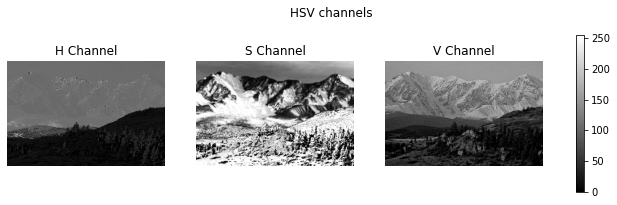

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
fig.suptitle('HSV channels')
ims = ax1.imshow(h_channel, cmap='gray', vmax=255, vmin=0)
ax1.axis('off')
ax1.set_title('H Channel')
ims = ax2.imshow(s_channel, cmap='gray', vmax=255, vmin=0)
ax2.set_title('S Channel')
ax2.axis('off')
ims = ax3.imshow(v_channel, cmap='gray', vmax=255, vmin=0)
ax3.set_title('V Channel')
ax3.axis('off')
plt.subplots_adjust(top=0.85)
fig.colorbar(ims, ax=[ax1, ax2, ax3])
plt.show()

###### Point 3: Obtain the histogram of the six components: R, G, B, H, S, V.

In [8]:
def calculate_histogram(channel: np.array) -> np.array:
  histogram = cv2.calcHist([channel],[0],None,[256],[1,256])
  return histogram

In [9]:
hist_red = calculate_histogram(red_channel)
hist_blue = calculate_histogram(blue_channel)
hist_green = calculate_histogram(green_channel)
hist_h = calculate_histogram(h_channel)
hist_s = calculate_histogram(s_channel)
hist_v = calculate_histogram(v_channel)

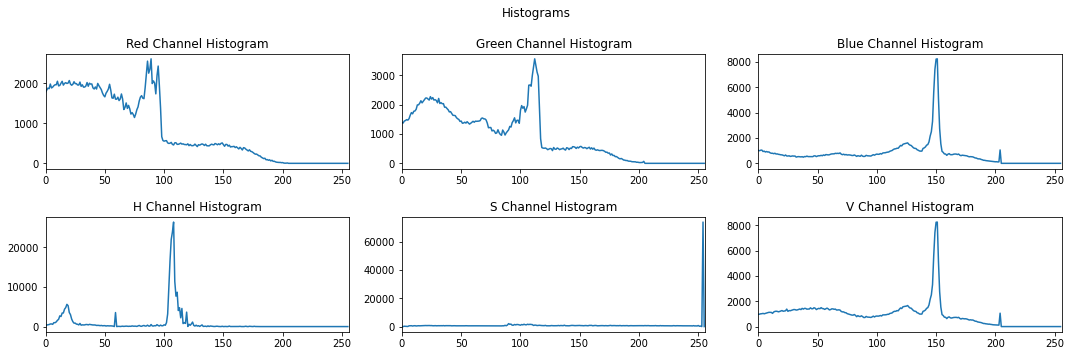

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

fig.suptitle('Histograms')
ax[0, 0].plot(hist_red)
ax[0, 0].set_xlim([0,256])
ax[0, 0].set_title('Red Channel Histogram')
ax[0, 1].plot(hist_green)
ax[0, 1].set_xlim([0,256])
ax[0, 1].set_title('Green Channel Histogram')
ax[0, 2].plot(hist_blue)
ax[0, 2].set_xlim([0,256])
ax[0, 2].set_title('Blue Channel Histogram')
ax[1, 0].plot(hist_h)
ax[1, 0].set_xlim([0,256])
ax[1, 0].set_title('H Channel Histogram')
ax[1, 1].plot(hist_s)
ax[1, 1].set_xlim([0,256])
ax[1, 1].set_title('S Channel Histogram')
ax[1, 2].plot(hist_v)
ax[1, 2].set_xlim([0,256])
ax[1, 2].set_title('V Channel Histogram')
fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=0.85)
plt.show()

###### Point 4: Select the R-G-B component with the high contrast and use it in the next tasks.

In [11]:
def brightness(im: np.array) -> float:
    """ Function to estimate the average light intensity.
    """
    b = np.sum(im) / (im.shape[0] * im.shape[1])
    return b

def contrast(im: np.array) -> float:
    """ Function to estimate the difference in intensities.
    """
    b = brightness(im)
    c = np.sum(np.square(im - b)) / (im.shape[0] * im.shape[1])
    return c

def find_image_highest_contrast(channels: list) -> int:
  index = -1
  max = 0
  for i,channel in enumerate(channels):
    cont = contrast(channel)
    if (cont > max):
      max = cont
      index = i
  return index

In [12]:
channel_name = ['red', 'green', 'blue', 'H', 'S', 'V']
channels = [red_channel, green_channel, blue_channel, 
            h_channel, s_channel, v_channel]

idx = find_image_highest_contrast(channels)
highest_contrast_image = channels[idx]

print(f'Channel with the highest contrast: {channel_name[idx]}')

Channel with the highest contrast: S


###### Point 5: Generate a set of 5 images through a 4-step iterative process of reducing by 2 the number of rows and columns of the original image. That is, if the original image has $N$ rows and $M$ columns, the sizes of the rest of the images will be $N/2$x$M/2$, $N/4$x$M/4$, $N/8$x$M/8$ and $N/16$x$M/16$.

In [13]:
def halve_image(im: np.array, iterations: int) -> list:
  div = 1
  halved_ims = []
  for i in range(iterations+1):
    width = int(im.shape[1]/div)
    height = int(im.shape[0]/div)
    dim = (width, height)
    imRes = cv2.resize(im,dim)
    div = div * 2
    halved_ims.append(imRes)
  return halved_ims

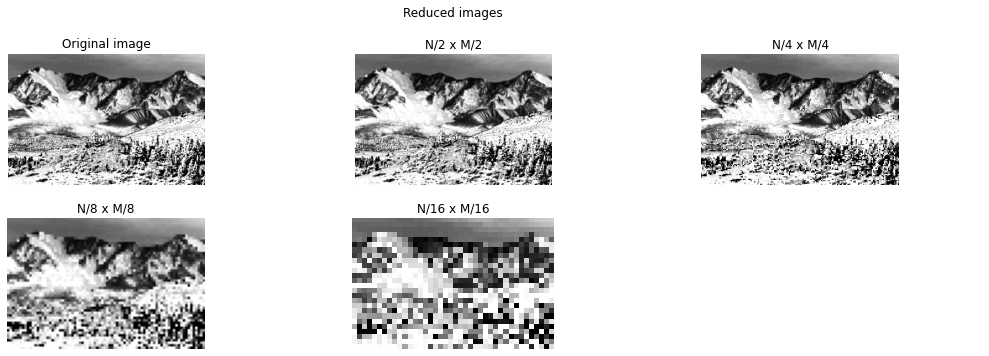

In [14]:
resized_images = halve_image(im=highest_contrast_image, iterations=4)

fig, ax = plt.subplots(2, 3, figsize=(15, 5))

fig.suptitle('Reduced images')
ims = ax[0, 0].imshow(resized_images[0], cmap='gray', vmax=255, vmin=0)
ax[0, 0].axis('off')
ax[0, 0].set_title('Original image')
ims = ax[0, 1].imshow(resized_images[1], cmap='gray', vmax=255, vmin=0)
ax[0, 1].axis('off')
ax[0, 1].set_title('N/2 x M/2')
ims = ax[0, 2].imshow(resized_images[2], cmap='gray', vmax=255, vmin=0)
ax[0, 2].axis('off')
ax[0, 2].set_title('N/4 x M/4')
ims = ax[1, 0].imshow(resized_images[3], cmap='gray', vmax=255, vmin=0)
ax[1, 0].axis('off')
ax[1, 0].set_title('N/8 x M/8')
ims = ax[1, 1].imshow(resized_images[4], cmap='gray', vmax=255, vmin=0)
ax[1, 1].axis('off')
ax[1, 1].set_title('N/16 x M/16')
ax[-1, -1].axis('off')


fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=0.85)
plt.show()

###### Point 6: Generate a set of 4 images, by reducing the number of bits used to represent the gray values of the original image by 2, three times.

In [15]:
def color_depth_image(im: np.array, iterations: int) -> list:
  bits = 8
  dc_ims = []
  for i in range(iterations+1):
    colores = 2 ** bits
    grupo = 256/colores
    imNew = np.array([[None]*len(im[0])]*len(im))
    for j in range(len(im)):
      for k in range(len(im[0])):
        nuevo = False
        cont = 0
        while(not nuevo):
          if(im[j][k] < (cont + grupo)):
            imNew[j][k] = int(cont)
            nuevo = True
          else:
            cont += grupo
    dc_ims.append(imNew.astype(np.uint8))
    bits /= 2
  return dc_ims

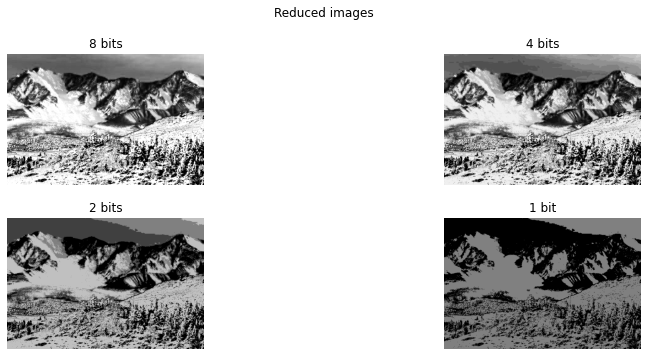

In [16]:
cd_images = color_depth_image(im=highest_contrast_image, iterations=3)

fig, ax = plt.subplots(2, 2, figsize=(15, 5))

fig.suptitle('Reduced images')
ims = ax[0, 0].imshow(cd_images[0], cmap='gray', vmax=255, vmin=0)
ax[0, 0].axis('off')
ax[0, 0].set_title('8 bits')
ims = ax[0, 1].imshow(cd_images[1], cmap='gray', vmax=255, vmin=0)
ax[0, 1].axis('off')
ax[0, 1].set_title('4 bits')
ims = ax[1, 0].imshow(cd_images[2], cmap='gray', vmax=255, vmin=0)
ax[1, 0].axis('off')
ax[1, 0].set_title('2 bits')
ims = ax[1, 1].imshow(cd_images[3], cmap='gray', vmax=255, vmin=0)
ax[1, 1].axis('off')
ax[1, 1].set_title('1 bit')


fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=0.85)
plt.show()